<a href="https://colab.research.google.com/github/RegaipKURT/Machine-Learning-Python/blob/master/qualitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qualitics of Products - BUTS (Bozüyük Üretim Takip Sistemi)

##Dateset Description
The datased used in this project mostly consists from sensor measurements from production line. Other than sensor measurements this dataset also include values about the products and dates and times of processes. 


##Goal
The purpose of the project is to find which part or phase of the production causes defective products. Is it possible to determine or even modelling, which product party will have more defective outcomes from sensor values? If it is how can we reduce the number defective products?

This project is aimed to find answers to questions above. Since the modelling or predictions has no affect on the outcomes we will focus on analysis part much more. Predictive models will be used to find the part of inputs which causes defective products.


##Expected Value Framework
The expected benefit of the project is to find causes of the defective products and hence by designing the production line again to reduce the number of defective products. So our benefit, can be financially described as the difference between the cost of defective products before the project and after the project. So this difference of the costs must be higher than the project cost in order to be defined profitable. 

The lack of contact between persons who made this project and who made financial decisions from the inside of company makes it impossible to decide how higher benefit should be than the cost. 

But still we can describe the expected benefit formula of the project. Total number of products multipllied by its cost after analytics minus  total number of products multipllied by its cost before analytics. During the project these cost terms may change so they sould be defined concretely in the formula. 

After the expected benefit we need expected cost of the project and this cost could be specified with financial unit of the company. Since we don't have connection to financial unit we will be define expected cost as a function.

Our result can be assesed by subtracting eepected value from expected cost. Our formula is as defined as below: 

**$${EV} = {EB} - {EL}$$**

**EV** represents Expected Value and Expected Value equals to difference between Expected Benefit minus Expected Loss

$$
EV =\frac{ {n_{1}} + {n_{2}} }{2} \mathcal{\left(\frac{\sum\limits _{i}^{n_{1}} c_{b}}{n_{1}} \ - \frac{\sum\limits _{i}^{n_{2}} c_{a}}{n_{2}}\right) \ -\ f( c)}
$$

EV represents the expected value and ${f( c)}$ is the cost function of the project. $n$ is the total number of products and $c_{a}$ and $c_{b}$ are the cost of the defective product respectively after the project and before the project.

So according to this formula the gap between the total cost of the defective product before the project and after the project must be higher than the cost of the project in order to be profitable.

---
**Note:** *The diffrerence of the costs should be normalize. Because the number 
of products influences the costs between after and before the project.* So we multiplied normalized cost difference with $\frac{ {n_{1}} + {n_{2}} }{2} $.

---

## Crisp-DM
<img width="800" src='https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png' />



## 1.   Business Understanding

Business information has been given by the company's data science team to group. We defined an expected value framework above with respect to these informations.

## 2.   Data Understanding
First we got information from business department and then we tried to grasp deeply the dataset by using visualization techniques. 

## 3.   Data Preparation

We have missing values and outliers to handle in our dataset. We used difference methods to deal with missing values and outliers. We will explain our methods on the presentation. 

After handle the outliers and missing values we will be try to enhance our dataset by using feature engineering. 

## 4.   Analysis and Modelling
We used statistical tests and different models to optimize the problem. 

## 5.   Evaluation
Statistical test will be examined by its own methods. Since we have a classification problem we will use models which is convenient to this problem. According to business department, it is hard to get well-fitted models to this dataset.

## 6.   Deployment
Since we have no intention to use this analysis in real world application we don't have to deploy our models and analysis.


### After business and data understanding we have a project cycle between the third and fifth section constantly. We keep going by improving our results.


In [21]:
!pip install autofeat
import autofeat

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import pandas as pd
#import drive to save files
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Patika/qualitics.csv")
print(df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8491, 59)


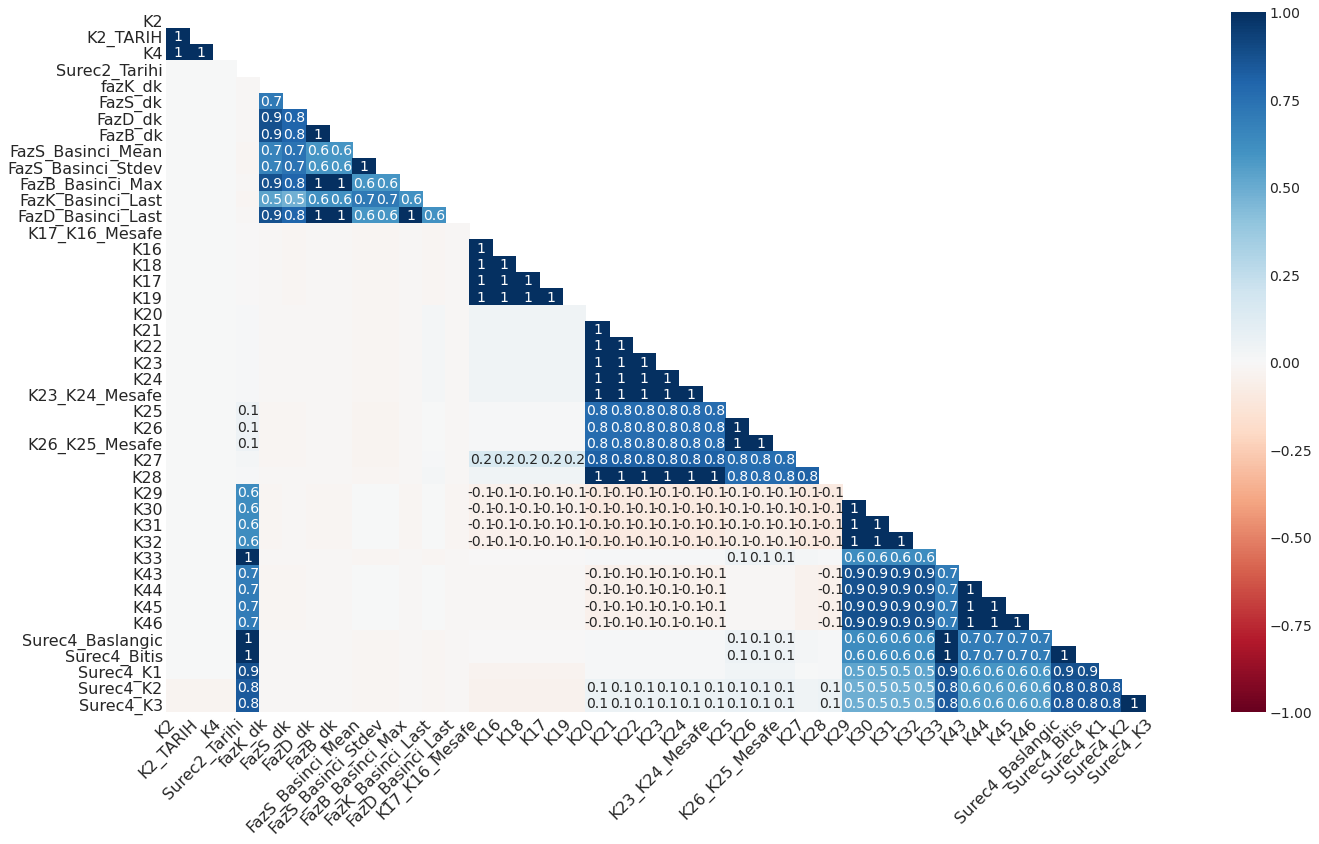

In [23]:
msno.heatmap(df)

In [24]:
iskarta = np.where((df["Kalite"] == 10) | (df["Kalite"] == 11.0), 1, 0)
df["ISKARTA"] = iskarta

In [25]:
df.columns

Index(['Surec1_Onay_Tarihi', 'K2', 'K2_TARIH', 'K4', 'Surec2_Tarihi',
       'Kalite_Kontrol_Tarihi', 'MAKINE', 'Kalite', 'Surec1_Bitis_Tarihi',
       'Surec1_Baslama_Tarihi', 'PART_NO', 'fazK_dk', 'FazS_dk', 'FazD_dk',
       'FazB_dk', 'FazS_Basinci_Mean', 'FazS_Basinci_Stdev',
       'FazB_Basinci_Max', 'FazK_Basinci_Last', 'FazD_Basinci_Last',
       'K17_K16_Mesafe', 'K16', 'K18', 'K17', 'K19', 'K20', 'K21', 'K22',
       'K23', 'K24', 'K23_K24_Mesafe', 'K25', 'K26', 'K26_K25_Mesafe', 'K27',
       'K28', 'K29', 'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37',
       'K38', 'K39', 'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46',
       'Surec4_Baslangic', 'Surec4_Bitis', 'Surec4_K1', 'Surec4_K2',
       'Surec4_K3', 'ISKARTA'],
      dtype='object')

In [26]:
dates = ["Surec1_Onay_Tarihi", "Surec2_Tarihi", "Kalite_Kontrol_Tarihi", "Surec1_Bitis_Tarihi", "Surec1_Baslama_Tarihi", "Surec4_Baslangic", "Surec4_Bitis"]

for i in dates:
    df[i] = pd.to_datetime(df[i])

In [27]:
df["Vardiya_1"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 0) & (df.Surec1_Bitis_Tarihi.dt.hour <= 7), 1, 0)
df["Vardiya_2"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 8) & (df.Surec1_Bitis_Tarihi.dt.hour <= 15), 1, 0)
df["Vardiya_3"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 16) & (df.Surec1_Bitis_Tarihi.dt.hour <= 23), 1, 0)

df.Vardiya_1 = df.Vardiya_1.astype("category")
df.Vardiya_2 = df.Vardiya_2.astype("category")
df.Vardiya_3 = df.Vardiya_3.astype("category")

In [28]:
df.Surec2_Tarihi = pd.to_datetime(df.Surec2_Tarihi)
df.Surec4_Baslangic = pd.to_datetime(df.Surec4_Baslangic)
df.Surec1_Baslama_Tarihi = pd.to_datetime(df.Surec1_Baslama_Tarihi)

In [29]:
df["SUREC_1_2_FARK"] = (df.Surec2_Tarihi- df.Surec1_Baslama_Tarihi)
df["SUREC_1_4_FARK"] = (df.Surec4_Baslangic- df.Surec1_Baslama_Tarihi) 
df["SUREC_2_4_FARK"] = (df.Surec4_Baslangic- df.Surec2_Tarihi) 

df.SUREC_1_2_FARK=df.SUREC_1_2_FARK.dt.seconds / 60
df.SUREC_1_4_FARK=df.SUREC_1_4_FARK.dt.seconds / 60
df.SUREC_2_4_FARK=df.SUREC_2_4_FARK.dt.seconds / 60

In [30]:
df["SUREC_1_2_FARK_SAAT"] = (df.Surec2_Tarihi- df.Surec1_Baslama_Tarihi)
df["SUREC_1_4_FARK_SAAT"] = (df.Surec4_Baslangic- df.Surec1_Baslama_Tarihi) 
df["SUREC_2_4_FARK_SAAT"] = (df.Surec4_Baslangic- df.Surec2_Tarihi) 

df.SUREC_1_2_FARK_SAAT=df.SUREC_1_2_FARK_SAAT.dt.seconds / 3600
df.SUREC_1_4_FARK_SAAT=df.SUREC_1_4_FARK_SAAT.dt.seconds / 3600
df.SUREC_2_4_FARK_SAAT=df.SUREC_2_4_FARK_SAAT.dt.seconds / 3600

In [31]:
df.SUREC_2_4_FARK

0       214.0
1       213.5
2       889.0
3       887.0
4       184.5
        ...  
8486    182.5
8487    177.0
8488    189.5
8489    180.0
8490    180.0
Name: SUREC_2_4_FARK, Length: 8491, dtype: float64

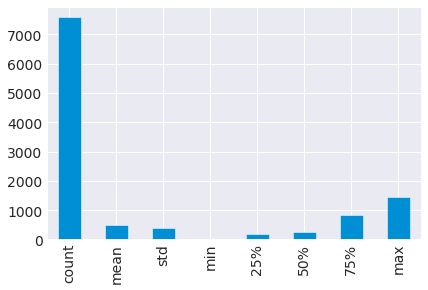

In [32]:
df.SUREC_2_4_FARK.describe().plot(kind="bar")

In [33]:
df.isna().sum()

Surec1_Onay_Tarihi        0
K2                     8490
K2_TARIH               8490
K4                     8490
Surec2_Tarihi           918
                       ... 
SUREC_1_4_FARK          918
SUREC_2_4_FARK          918
SUREC_1_2_FARK_SAAT     918
SUREC_1_4_FARK_SAAT     918
SUREC_2_4_FARK_SAAT     918
Length: 69, dtype: int64

In [34]:
df.tail(50)

,Surec1_Onay_Tarihi,K2,K2_TARIH,K4,Surec2_Tarihi,Kalite_Kontrol_Tarihi,MAKINE,Kalite,Surec1_Bitis_Tarihi,Surec1_Baslama_Tarihi,PART_NO,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_Baslangic,Surec4_Bitis,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,Vardiya_1,Vardiya_2,Vardiya_3,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT
8441,2021-08-22 19:26:00+03:00,NaN,NaN,NaN,2021-08-24 15:45:00+03:00,2021-08-25 13:29:00+03:00,X,2,2021-08-22 18:48:38.359000+03:00,2021-08-22 18:21:28.071000+03:00,3630,7.059488,15.586358,1.466868,2.566960,13.7760,0.310416,7.0490,5.6000,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410.8,77.0,102.2,37.8,71.4,320.6,264.6,247.8,0.238,0.322,4.242,11.522,15.764,64.4,2199.4,399.0,144.2,37.8,2021-08-24 18:37:00+03:00,2021-08-25 10:37:00+03:00,25.2,NaN,NaN,0,0,0,1,1283.516667,15.516667,172.0,21.391944,0.258611,2.866667
8442,2021-08-22 19:26:00+03:00,NaN,NaN,NaN,2021-08-24 15:34:00+03:00,2021-08-25 14:53:00+03:00,Y,2,2021-08-22 18:48:38.359000+03:00,2021-08-22 18:21:28.071000+03:00,3630,7.059488,15.586358,1.466868,2.566960,13.7760,0.310416,7.0490,5.6000,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410.8,77.0,102.2,37.8,72.8,317.8,263.2,246.4,0.238,0.308,3.584,12.642,16.226,67.2,2199.4,399.0,144.2,37.8,2021-08-24 19:13:30+03:00,2021-08-25 11:13:30+03:00,25.2,NaN,NaN,0,0,0,1,1272.516667,52.016667,219.5,21.208611,0.866944,3.658333
8443,2021-08-22 20:00:00+03:00,NaN,NaN,NaN,NaT,2021-08-25 14:40:00+03:00,Y,2,2021-08-22 19:21:53.754000+03:00,2021-08-22 18:54:43.444000+03:00,3631,6.967913,15.586267,1.467162,2.658883,13.1320,1.467496,7.0490,2.9036,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.8,263.2,246.4,0.238,0.308,3.584,12.642,16.226,67.2,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
8444,2021-08-22 20:00:00+03:00,NaN,NaN,NaN,2021-08-24 15:40:00+03:00,2021-08-25 13:57:00+03:00,Y,10,2021-08-22 19:21:53.754000+03:00,2021-08-22 18:54:43.444000+03:00,3631,6.967913,15.586267,1.467162,2.658883,13.1320,1.467496,7.0490,2.9036,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410.8,77.0,102.2,37.8,72.8,317.8,263.2,246.4,0.238,0.308,3.584,12.642,16.226,67.2,2199.4,399.0,144.2,37.8,2021-08-24 18:48:30+03:00,2021-08-25 10:48:30+03:00,25.2,NaN,NaN,1,0,0,1,1245.266667,1433.766667,188.5,20.754444,23.896111,3.141667
8445,2021-08-22 20:00:00+03:00,NaN,NaN,NaN,NaT,2021-08-25 13:29:00+03:00,X,2,2021-08-22 19:21:53.754000+03:00,2021-08-22 18:54:43.444000+03:00,3631,6.967913,15.586267,1.467162,2.658883,13.1320,1.467496,7.0490,2.9036,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.6,264.6,247.8,0.238,0.322,4.242,11.522,15.764,64.4,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
8446,2021-08-22 20:00:00+03:00,NaN,NaN,NaN,NaT,2021-08-25 13:30:00+03:00,X,2,2021-08-22 19:21:53.754000+03:00,2021-08-22 18:54:43.444000+03:00,3631,6.967913,15.586267,1.467162,2.658883,13.1320,1.467496,7.0490,2.9036,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.6,264.6,247.8,0.238,0.322,4.242,11.522,15.764,64.4,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
8447,2021-08-22 20:37:00+03:00,NaN,NaN,NaN,2021-08-24 15:35:00+03:00,2021-08-25 14:35:00+03:00,Y,2,2021-08-22 20:12:04.289000+03:00,2021-08-22 19:44:54.009000+03:00,3632,7.059507,15.494637,1.466832,2.567015,13.5800,0.268285,7.2576,5.8100,0.20748,30.8,109.2,15.40,78.4,50.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2410.8,77.0,102.2,37.8,72.8,317.8,263.2,246.4,0.238,0.308,3.584,12.642

In [35]:
def removeMissingValues(df, directRemoveRate=0.95, replacedRemoveRate=0.75, axis=1):
    dropped = {}
    for i in df.columns:
        missRate = df[i].isna().sum() / df.shape[0]
        if missRate > directRemoveRate:
            df.drop(labels=[i], axis=axis, inplace=True)
            dropped[i] = missRate
            continue
        if missRate > replacedRemoveRate:
            df[str(i) + "_isNa"] = df[i].isna()
            df.drop(labels=[i], axis=axis, inplace=True)
            dropped[i] = missRate
    print("Removed Columns and Rates:\n", dropped)

removeMissingValues(df)

Removed Columns and Rates:
 {'K2': 0.9998822282416676, 'K2_TARIH': 0.9998822282416676, 'K4': 0.9998822282416676}


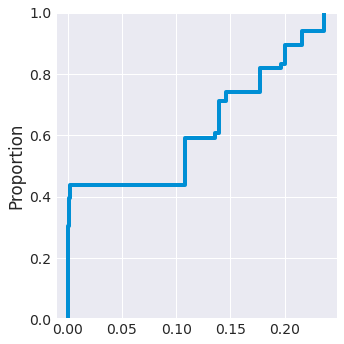

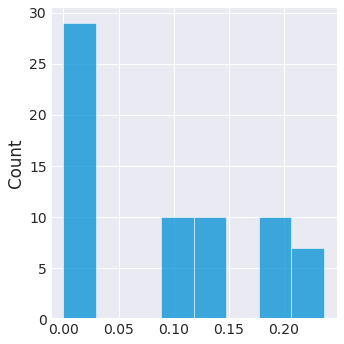

In [36]:
missingRatesDf = (df.isna().sum() / df.shape[0])
sns.displot(missingRatesDf, kind="ecdf")
sns.displot(missingRatesDf, kind="hist")

In [37]:
df.drop(labels=["Kalite", "PART_NO"], axis=1, inplace=True)

In [38]:
df.MAKINE = df.MAKINE.astype("category")
df.ISKARTA = df.ISKARTA.astype("category")
dates = ["Surec1_Onay_Tarihi", "Surec2_Tarihi", "Kalite_Kontrol_Tarihi", "Surec1_Bitis_Tarihi", "Surec1_Baslama_Tarihi", "Surec4_Baslangic", "Surec4_Bitis"]

for i in dates:
    df[i] = pd.to_datetime(df[i])

In [39]:
df.head()

,Surec1_Onay_Tarihi,Surec2_Tarihi,Kalite_Kontrol_Tarihi,MAKINE,Surec1_Bitis_Tarihi,Surec1_Baslama_Tarihi,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_Baslangic,Surec4_Bitis,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,Vardiya_1,Vardiya_2,Vardiya_3,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT
0,2021-05-01 03:27:00+03:00,2021-05-02 18:12:00+03:00,2021-05-05 17:20:00+03:00,X,2021-05-01 03:19:58.110000+03:00,2021-05-01 02:52:18.761000+03:00,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,NaN,NaN,NaN,NaN,2021-05-03 21:46:00+03:00,2021-05-04 13:46:00+03:00,23.8,1709.4,1712.2,0,1,0,0,919.683333,1133.683333,214.0,15.328056,18.894722,3.566667
1,2021-05-01 03:27:00+03:00,2021-05-02 18:14:00+03:00,2021-05-05 17:21:00+03:00,X,2021-05-01 03:19:58.110000+03:00,2021-05-01 02:52:18.761000+03:00,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,NaN,NaN,NaN,NaN,2021-05-03 21:47:30+03:00,2021-05-04 13:47:30+03:00,23.8,1709.4,1712.2,0,1,0,0,921.683333,1135.183333,213.5,15.361389,18.919722,3.558333
2,2021-05-01 03:58:00+03:00,2021-05-02 18:10:00+03:00,2021-05-04 15:48:00+03:00,X,2021-05-01 03:19:58.110000+03:00,2021-05-01 02:52:18.761000+03:00,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,NaN,NaN,NaN,NaN,2021-05-03 08:59:00+03:00,2021-05-04 00:59:00+03:00,23.8,1709.4,1712.2,1,1,0,0,917.683333,366.683333,889.0,15.294722,6.111389,14.816667
3,2021-05-01 03:58:00+03:00,2021-05-02 18:11:00+03:00,2021-05-04 15:45:00+03:00,X,2021-05-01 03:19:58.110000+03:00,2021-05-01 02:52:18.761000+03:00,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,NaN,NaN,NaN,NaN,2021-05-03 08:58:00+03:00,2021-05-04 00:58:00+03:00,23.8,1709.4,1712.2,1,1,0,0,918.683333,365.683333,887.0,15.311389,6.094722,14.783333
4,2021-05-01 03:59:00+03:00,2021-05-03 16:53:00+03:00,2021-05-04 15:02:00+03:00,Y,2021-05-01 03:19:58.110000+03:00,2021-05-01 02:52:18.761000+03:00,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,119.0,78.4,33.6,72.8,320.6,259.0,249.2,0.266,0.308,3.402,12.124,15.526,63.0,2210.6,413.0,89.6,35.0,2021-05-03 19:57:30+03:00,2021-05-04 11:57:30+03:00,23.8,1710.8,1709.4,0,1,0,0,840.683333,1025.183333,184.5,14.011389,17.086389,3.075000


In [40]:
df.Surec1_Bitis_Tarihi.dt.hour.value_counts()

5     561
11    493
4     485
6     477
13    473
3     472
19    446
8     444
0     433
21    424
14    423
16    419
12    398
22    380
20    378
17    349
9     324
1     295
7     195
15    193
23    132
10    112
18    100
2      85
Name: Surec1_Bitis_Tarihi, dtype: int64

In [41]:
df["Vardiya_1"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 0) & (df.Surec1_Bitis_Tarihi.dt.hour <= 7), 1, 0)
df["Vardiya_2"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 8) & (df.Surec1_Bitis_Tarihi.dt.hour <= 15), 1, 0)
df["Vardiya_3"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 16) & (df.Surec1_Bitis_Tarihi.dt.hour <= 23), 1, 0)
df["VARDIYA_SAAT"] = df.Surec1_Bitis_Tarihi.dt.hour

vard = []

for x, y,z in zip(df.Vardiya_1, df.Vardiya_2, df.Vardiya_3):
    if x == 1:
        vard.append(1)
    if y == 1:
        vard.append(2)
    if z == 1:
        vard.append(3)
    if (x==1 and y==1) or (y==1 and z==1) or (x ==1 and z==1):
        print("UYARI!")

df["VARDIYA"] = np.array(vard)
df["VARDIYA"] = df.VARDIYA.astype("category")

In [42]:
df.Vardiya_1.value_counts()

0    5488
1    3003
Name: Vardiya_1, dtype: int64

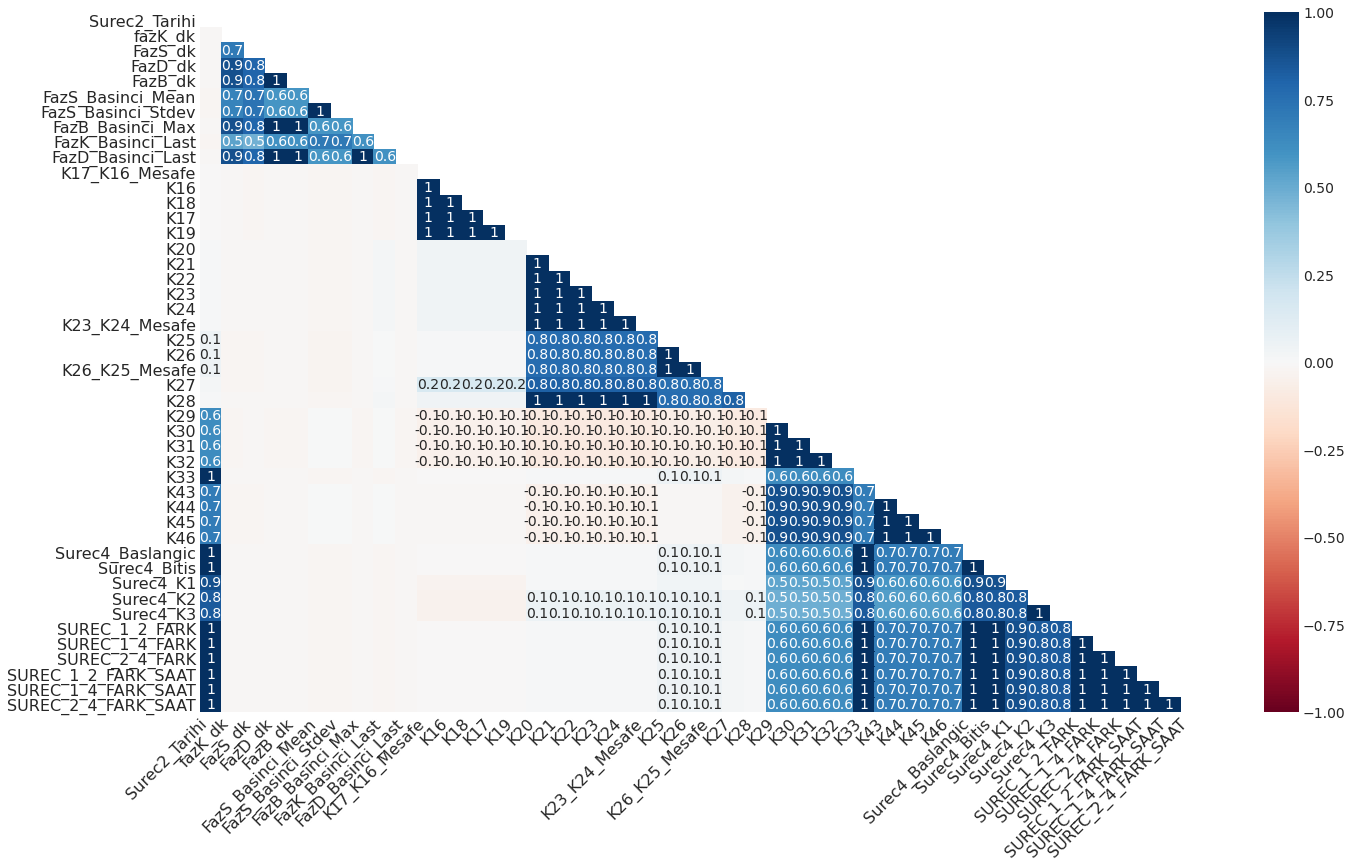

In [43]:
msno.heatmap(df)

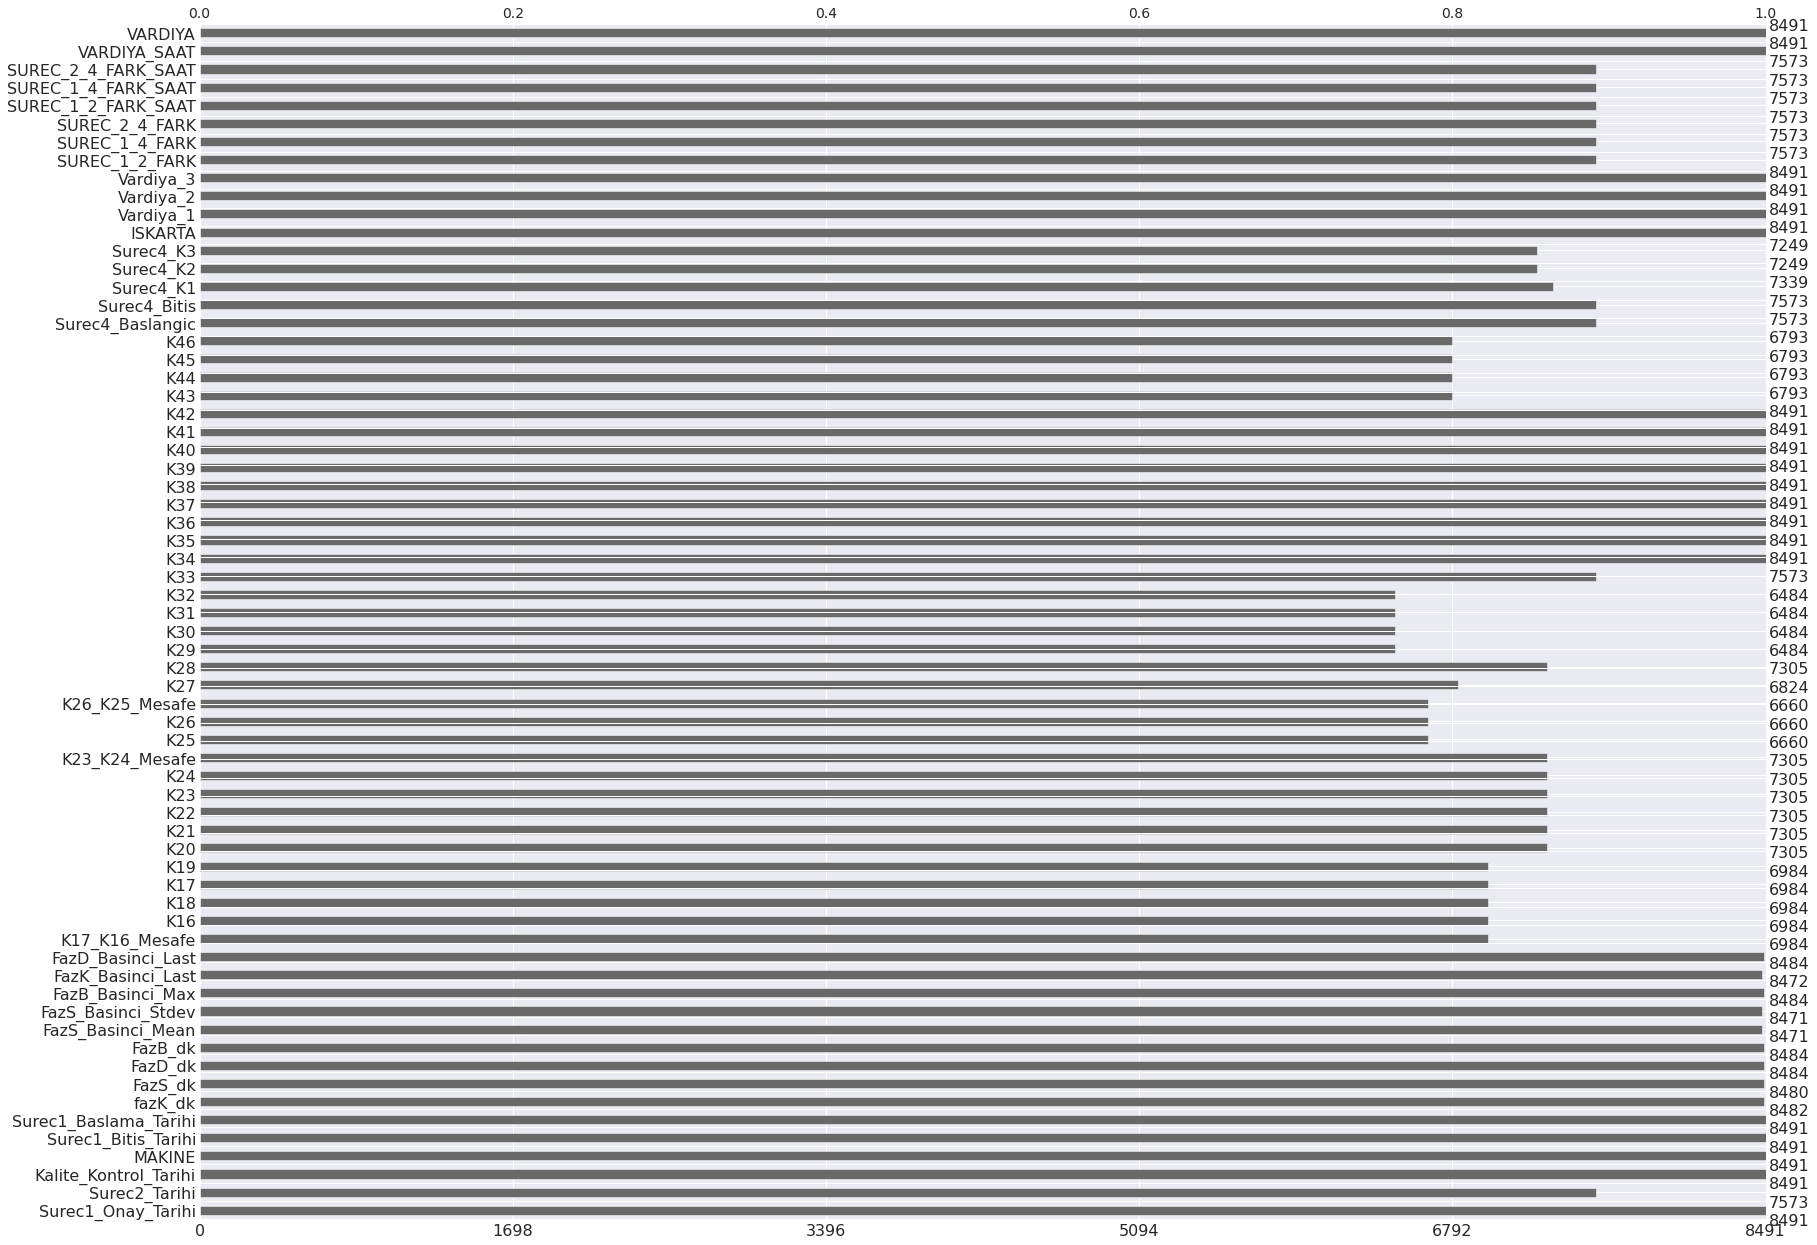

In [44]:
msno.bar(df)

In [45]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0] 
            df[col][df[col] >= percentiles[1]] = percentiles[1] 
        else:
            df[col]=df[col]
    return df

cleaned_df=cap_data(df)

capping the  Surec1_Onay_Tarihi
capping the  Surec2_Tarihi
capping the  Kalite_Kontrol_Tarihi
capping the  MAKINE
capping the  Surec1_Bitis_Tarihi
capping the  Surec1_Baslama_Tarihi
capping the  fazK_dk
capping the  FazS_dk
capping the  FazD_dk
capping the  FazB_dk
capping the  FazS_Basinci_Mean
capping the  FazS_Basinci_Stdev
capping the  FazB_Basinci_Max
capping the  FazK_Basinci_Last
capping the  FazD_Basinci_Last
capping the  K17_K16_Mesafe
capping the  K16
capping the  K18
capping the  K17
capping the  K19
capping the  K20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K21
capping the  K22
capping the  K23
capping the  K24
capping the  K23_K24_Mesafe
capping the  K25
capping the  K26
capping the  K26_K25_Mesafe
capping the  K27
capping the  K28
capping the  K29
capping the  K30
capping the  K31
capping the  K32
capping the  K33
capping the  K34
capping the  K35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning

capping the  K36
capping the  K37
capping the  K38
capping the  K39
capping the  K40
capping the  K41
capping the  K42
capping the  K43
capping the  K44
capping the  K45
capping the  K46
capping the  Surec4_Baslangic
capping the  Surec4_Bitis
capping the  Surec4_K1
capping the  Surec4_K2
capping the  Surec4_K3
capping the  ISKARTA
capping the  Vardiya_1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  Vardiya_2
capping the  Vardiya_3
capping the  SUREC_1_2_FARK
capping the  SUREC_1_4_FARK
capping the  SUREC_2_4_FARK
capping the  SUREC_1_2_FARK_SAAT
capping the  SUREC_1_4_FARK_SAAT
capping the  SUREC_2_4_FARK_SAAT
capping the  VARDIYA_SAAT
capping the  VARDIYA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying

In [46]:
cleaned_df["SUREC1_FARK"] = (cleaned_df.Surec1_Bitis_Tarihi - cleaned_df.Surec1_Baslama_Tarihi).dt.seconds
def add_datepart(df,dt_name,drop=True):
    dt_column = df[dt_name]
    column_dtype = dt_column.dtype
    
    attr = ['month','day','dayofweek','dayofyear']
    
    for a in attr:
        df["Date"+ a.capitalize()]= getattr(dt_column.dt,a)
    df["Date"+'Elapsed']=dt_column.astype("category")
    
    if drop:
        df.drop(dt_name,axis=1, inplace=True)

In [47]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   Surec1_Onay_Tarihi     8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 1   Surec2_Tarihi          7573 non-null   datetime64[ns, pytz.FixedOffset(180)]
 2   Kalite_Kontrol_Tarihi  8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 3   MAKINE                 8491 non-null   category                             
 4   Surec1_Bitis_Tarihi    8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 5   Surec1_Baslama_Tarihi  8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 6   fazK_dk                8482 non-null   float64                              
 7   FazS_dk                8480 non-null   float64                              
 8   FazD_dk                8484 non-null   float64                      

In [48]:
new_df = cleaned_df.copy()
for i in cleaned_df.columns:
    if type(new_df[i].dtype) == pd.core.dtypes.dtypes.DatetimeTZDtype:
        add_datepart(new_df, i, drop=True)

#dates
new_df.DateDay = new_df.DateDay.astype("category")
new_df.DateMonth = new_df.DateMonth.astype("category")
new_df.DateDayofweek = new_df.DateDayofweek.astype("category")
new_df.DateDayofyear = new_df.DateDayofyear.astype("category")

#integers which contain category
new_df.Vardiya_1 = new_df.Vardiya_1.astype("category")
new_df.Vardiya_2 = new_df.Vardiya_2.astype("category")
new_df.Vardiya_3 = new_df.Vardiya_3.astype("category")
new_df.VARDIYA_SAAT = new_df.VARDIYA_SAAT.astype("category")
new_df.ISKARTA = new_df.ISKARTA.astype("category")

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

for i in new_df.columns:
    if type(new_df[i].dtype) == np.dtype:
        new_df[i] = imputer.fit_transform(np.array(new_df[i]).reshape(-1,1))

In [50]:
cats = ["DateMonth", "DateDay", "DateDayofweek", "DateDayofyear", "DateElapsed"]
# cats = ["DateElapsed"]
deneme = new_df.copy()
for i in cats:
    deneme.drop(labels=[i], axis=1, inplace=True)

In [51]:
deneme.head()

,MAKINE,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,Vardiya_1,Vardiya_2,Vardiya_3,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,VARDIYA_SAAT,VARDIYA,SUREC1_FARK
0,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,28.0,109.2,15.54,79.8,49.98,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,91.0,99.4,36.4,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,2202.2,406.0,110.6,35.0,23.8,1709.4,1712.2,0,1,0,0,919.683333,1133.683333,214.0,15.328056,18.894722,3.566667,3,1,1659.0
1,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,28.0,109.2,15.54,79.8,49.98,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,91.0,99.4,36.4,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,2202.2,406.0,110.6,35.0,23.8,1709.4,1712.2,0,1,0,0,921.683333,1135.183333,213.5,15.361389,18.919722,3.558333,3,1,1659.0
2,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,28.0,109.2,15.54,79.8,49.98,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,91.0,99.4,36.4,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,2202.2,406.0,110.6,35.0,23.8,1709.4,1712.2,1,1,0,0,917.683333,366.683333,889.0,15.294722,6.111389,14.816667,3,1,1659.0
3,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,28.0,109.2,15.54,79.8,49.98,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,91.0,99.4,36.4,74.2,322.0,266.0,249.2,0.238,0.322,3.346,12.152,15.498,60.2,2202.2,406.0,110.6,35.0,23.8,1709.4,1712.2,1,1,0,0,918.683333,365.683333,887.0,15.311389,6.094722,14.783333,3,1,1659.0
4,Y,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,28.0,109.2,15.54,79.8,49.98,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,119.0,78.4,33.6,72.8,320.6,259.0,249.2,0.266,0.308,3.402,12.124,15.526,63.0,2210.6,413.0,89.6,35.0,23.8,1710.8,1709.4,0,1,0,0,840.683333,1025.183333,184.5,14.011389,17.086389,3.075000,3,1,1659.0


In [52]:
deneme2 = new_df.dropna()

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
oh = OneHotEncoder(drop="first")
deneme2.MAKINE = le.fit_transform(deneme2.MAKINE)
deneme2.ISKARTA = le.fit_transform(deneme2.ISKARTA)

deneme2.MAKINE = deneme2.MAKINE.astype("category")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
deneme3 = deneme2.copy()
print(deneme3.VARDIYA.value_counts())
print(deneme3.shape)

1    2736
2    2535
3    2302
Name: VARDIYA, dtype: int64
(7573, 65)


0.7122112211221122


array([[1028,  290],
       [ 146,   51]])

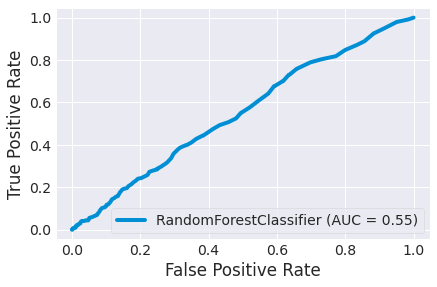

In [55]:
y = deneme3["ISKARTA"]
x = deneme3.drop(labels=["ISKARTA"], axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
print(accuracy_score(y_pred, y_test))
plot_roc_curve(model, X_test, y_test)
confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1174
           1       0.50      0.01      0.01       341

    accuracy                           0.77      1515
   macro avg       0.64      0.50      0.44      1515
weighted avg       0.71      0.77      0.68      1515

[[1172    2]
 [ 339    2]]


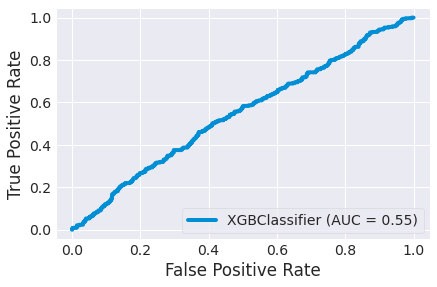

In [56]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(x, y,
#                                                       test_size=0.20, 
#                                                       random_state=101)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
#                                                     test_size=0.30, 
#                                                     random_state=101)

# print(X_train.shape, X_valid.shape, X_test.shape)

model_xgb = XGBClassifier()
model_xgb.fit(X_train2, y_train)
preds = model_xgb.predict(X_test2)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))
plot_roc_curve(model_xgb, X_test2, y_test)

In [57]:
deneme2.ISKARTA.value_counts()

0    5897
1    1676
Name: ISKARTA, dtype: int64

In [58]:
deneme2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 8490
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MAKINE               7573 non-null   category
 1   fazK_dk              7573 non-null   float64 
 2   FazS_dk              7573 non-null   float64 
 3   FazD_dk              7573 non-null   float64 
 4   FazB_dk              7573 non-null   float64 
 5   FazS_Basinci_Mean    7573 non-null   float64 
 6   FazS_Basinci_Stdev   7573 non-null   float64 
 7   FazB_Basinci_Max     7573 non-null   float64 
 8   FazK_Basinci_Last    7573 non-null   float64 
 9   FazD_Basinci_Last    7573 non-null   float64 
 10  K17_K16_Mesafe       7573 non-null   float64 
 11  K16                  7573 non-null   float64 
 12  K18                  7573 non-null   float64 
 13  K17                  7573 non-null   float64 
 14  K19                  7573 non-null   float64 
 15  K20                  

In [59]:
deneme2.columns

Index(['MAKINE', 'fazK_dk', 'FazS_dk', 'FazD_dk', 'FazB_dk',
       'FazS_Basinci_Mean', 'FazS_Basinci_Stdev', 'FazB_Basinci_Max',
       'FazK_Basinci_Last', 'FazD_Basinci_Last', 'K17_K16_Mesafe', 'K16',
       'K18', 'K17', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24',
       'K23_K24_Mesafe', 'K25', 'K26', 'K26_K25_Mesafe', 'K27', 'K28', 'K29',
       'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38', 'K39',
       'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46', 'Surec4_K1',
       'Surec4_K2', 'Surec4_K3', 'ISKARTA', 'Vardiya_1', 'Vardiya_2',
       'Vardiya_3', 'SUREC_1_2_FARK', 'SUREC_1_4_FARK', 'SUREC_2_4_FARK',
       'SUREC_1_2_FARK_SAAT', 'SUREC_1_4_FARK_SAAT', 'SUREC_2_4_FARK_SAAT',
       'VARDIYA_SAAT', 'VARDIYA', 'SUREC1_FARK', 'DateMonth', 'DateDay',
       'DateDayofweek', 'DateDayofyear', 'DateElapsed'],
      dtype='object')

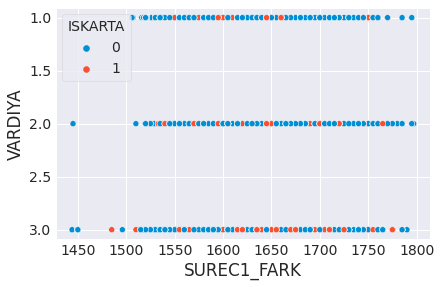

In [60]:
sns.scatterplot(x="SUREC1_FARK", y="VARDIYA", data=deneme3, hue="ISKARTA")

In [61]:
deneme3.MAKINE.value_counts()

0    4253
1    3320
Name: MAKINE, dtype: int64

In [62]:
deneme3.ISKARTA

0       0
1       0
2       1
3       1
4       0
       ..
8486    0
8487    0
8488    0
8489    0
8490    0
Name: ISKARTA, Length: 7573, dtype: int64

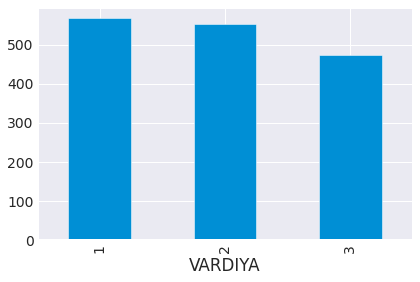

In [63]:
deneme3.groupby("VARDIYA").sum()["FazD_Basinci_Last"].plot(kind="bar")

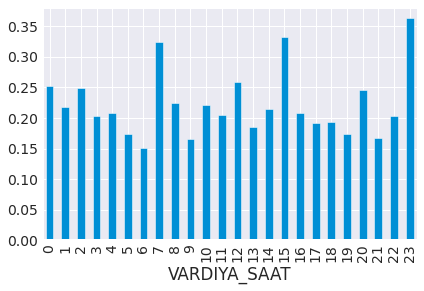

In [64]:
deneme3.groupby("VARDIYA_SAAT").mean()["FazD_Basinci_Last"].plot(kind="bar")

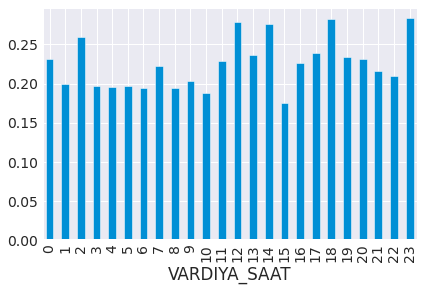

In [65]:
deneme3.groupby("VARDIYA_SAAT").mean()["ISKARTA"].plot(kind="bar")

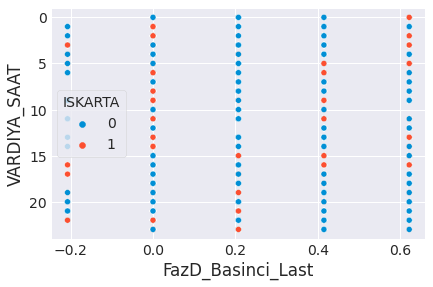

In [66]:
sns.scatterplot(x="FazD_Basinci_Last", y="VARDIYA_SAAT", data=deneme3, hue="ISKARTA")

FazD_Basinci_Last  ISKARTA
-0.20748           0            14
                   1             1
                   0            74
                   1            19
 0.00000           0          3099
                   1           865
 0.20748           0           226
                   1            59
 0.41496           0          1660
                   1           477
 0.62202           0           824
                   1           255
Name: ISKARTA, dtype: int64


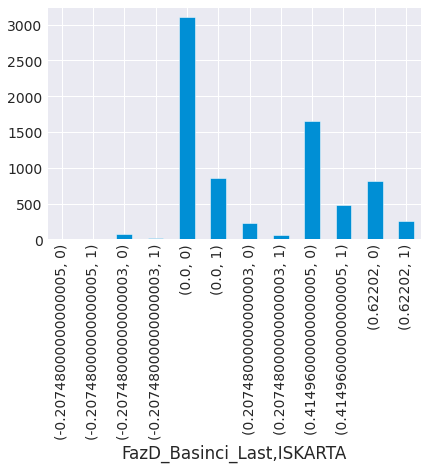

In [67]:
print(deneme3.groupby("FazD_Basinci_Last")["ISKARTA"].value_counts())
deneme3.groupby("FazD_Basinci_Last")["ISKARTA"].value_counts().plot(kind="bar")
# 007, 0.25, 0.27, 0.26, 0.28, 0.30

In [68]:
deneme3.columns

Index(['MAKINE', 'fazK_dk', 'FazS_dk', 'FazD_dk', 'FazB_dk',
       'FazS_Basinci_Mean', 'FazS_Basinci_Stdev', 'FazB_Basinci_Max',
       'FazK_Basinci_Last', 'FazD_Basinci_Last', 'K17_K16_Mesafe', 'K16',
       'K18', 'K17', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24',
       'K23_K24_Mesafe', 'K25', 'K26', 'K26_K25_Mesafe', 'K27', 'K28', 'K29',
       'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38', 'K39',
       'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46', 'Surec4_K1',
       'Surec4_K2', 'Surec4_K3', 'ISKARTA', 'Vardiya_1', 'Vardiya_2',
       'Vardiya_3', 'SUREC_1_2_FARK', 'SUREC_1_4_FARK', 'SUREC_2_4_FARK',
       'SUREC_1_2_FARK_SAAT', 'SUREC_1_4_FARK_SAAT', 'SUREC_2_4_FARK_SAAT',
       'VARDIYA_SAAT', 'VARDIYA', 'SUREC1_FARK', 'DateMonth', 'DateDay',
       'DateDayofweek', 'DateDayofyear', 'DateElapsed'],
      dtype='object')

In [69]:
deneme3.groupby("DateDayofweek")["ISKARTA"].value_counts()

DateDayofweek  ISKARTA
0.0            0          827
               1          232
1.0            0          933
               1          257
2.0            0          756
               1          225
3.0            0          872
               1          261
4.0            0          942
               1          231
5.0            0          620
               1          167
6.0            0          947
               1          303
Name: ISKARTA, dtype: int64

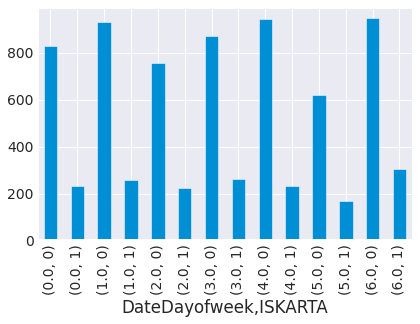

In [70]:
deneme3.groupby("DateDayofweek")["ISKARTA"].value_counts().plot(kind="bar")

In [71]:
deneme3.groupby("DateDayofweek")["ISKARTA"].value_counts()

DateDayofweek  ISKARTA
0.0            0          827
               1          232
1.0            0          933
               1          257
2.0            0          756
               1          225
3.0            0          872
               1          261
4.0            0          942
               1          231
5.0            0          620
               1          167
6.0            0          947
               1          303
Name: ISKARTA, dtype: int64

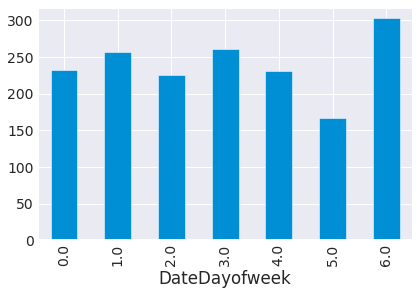

In [72]:
deneme3.groupby("DateDayofweek")["ISKARTA"].sum().plot(kind="bar")

In [73]:
deneme3.groupby("MAKINE").sum()

,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,SUREC1_FARK
MAKINE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33849.590556,60495.975914,4173.03249,9987.585447,58609.2626,6292.028040,30533.4092,19668.15158,903.11802,122644.2,464038.4,65841.16,340335.8,212725.80,10737944.0,177977.8,3773126.0,1814278.2,1192616.6,621615.4,457210.6,818286.0,262383.212,51295.86,159040.322,10264557.8,406777.0,426430.2,152129.6,298492.6,1352346.8,1114929.2,1045168.6,1052.282,1362.424,15216.838,50567.552,65794.246,270373.6,9366946.4,1753794.0,475594.0,151971.4,106365.7,7249702.6,7251421.8,939,3.087353e+06,3.039680e+06,2040479.40,51455.888589,50661.341367,34007.990000,6920884.0
1,26416.622429,47191.510485,3250.34754,7791.061007,45760.8655,4911.416271,23858.1490,15317.38082,691.53504,95733.4,362292.0,51419.62,265732.6,166109.86,8381905.0,138857.6,2941407.0,1417029.6,931635.6,485377.2,357173.6,638755.6,204653.456,40075.42,124056.450,8012165.0,318647.0,333919.6,118847.4,227784.2,1054277.0,868996.8,815343.2,815.584,1050.406,11790.002,39560.024,51351.090,216556.2,7312228.0,1366897.0,371158.2,118799.8,83067.6,5657527.4,5659382.4,737,2.451796e+06,2.352405e+06,1620002.62,40863.266433,39206.742756,27000.043667,5398343.0


In [74]:
for col in deneme3.groupby("MAKINE").sum().columns:
    print(col, ": ", deneme3.groupby("MAKINE").sum()[col][0] / deneme3.groupby("MAKINE").sum()[col][1])

fazK_dk :  1.2813746589895034
FazS_dk :  1.2819249753252133
FazD_dk :  1.2838727054892154
FazB_dk :  1.2819287948219045
FazS_Basinci_Mean :  1.2807725981493918
FazS_Basinci_Stdev :  1.2811025767204711
FazB_Basinci_Max :  1.2797895260022165
FazK_Basinci_Last :  1.2840414305243986
FazD_Basinci_Last :  1.3059613291612697
K17_K16_Mesafe :  1.2811014755560823
K16 :  1.280840868691548
K18 :  1.2804676502860317
K17 :  1.2807453808829181
K19 :  1.2806331905884598
K20 :  1.281086340157745
K21 :  1.2817289078883538
K22 :  1.282762297091154
K23 :  1.280338956927938
K24 :  1.2801320602175428
K23_K24_Mesafe :  1.280685207298551
K25 :  1.2800794907574566
K26 :  1.281062741367739
K26_K25_Mesafe :  1.2820854195592124
K27 :  1.279983091880277
K28 :  1.2819996219463272
K29 :  1.281121619437443
K30 :  1.276575646404956
K31 :  1.2770445340734935
K32 :  1.2800414649373366
K33 :  1.3104183696674736
K34 :  1.2827243694020247
K35 :  1.2830072561832755
K36 :  1.2818756567786904
K37 :  1.2902190332325525
K38 : 

In [75]:
deneme3.MAKINE.value_counts()

0    4253
1    3320
Name: MAKINE, dtype: int64

In [76]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics="mse")

In [77]:
y = deneme3["ISKARTA"]
x = deneme3.drop(labels=["ISKARTA"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

In [78]:
model.fit(X_train2, y_train, epochs=100, verbose=0)

In [79]:
y_pred = model.predict(X_test2) >= 0.44

In [80]:
preds = np.array(y_pred, dtype=np.int)

In [81]:
accuracy_score(preds, y_test)

0.6957095709570957

In [82]:
preds.shape

(1515, 1)

In [83]:
confusion_matrix(preds, y_test)

array([[986, 271],
       [190,  68]])

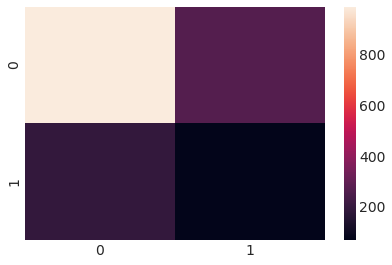

In [84]:
sns.heatmap(confusion_matrix(preds, y_test))

In [85]:
accuracy_score(preds, y_test)

0.6957095709570957

In [86]:
deneme3.groupby("ISKARTA").sum()

,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,SUREC1_FARK
ISKARTA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,46921.472301,83850.143610,5774.849227,13841.266597,81264.3538,8723.087126,42325.8542,27198.2123,1230.01032,169950.2,643475.0,91305.48,472007.2,295025.22,14888329.4,246883.0,5226501.0,2516644.2,1654520.0,862061.2,634660.6,1135282.4,363584.592,71142.12,220226.608,14232090.6,565936.0,591147.2,210907.2,409977.4,1874069.4,1544905.6,1448776.0,1454.726,1878.94,21032.956,70196.770,91239.204,378932.4,12988537.8,2429560.0,659631.0,210869.4,147632.8,10051090.0,10053899.8,4.340378e+06,4.215360e+06,2868951.18,72339.639511,70256.005211,47815.853000,9591398.0
1,13344.740685,23837.342789,1648.530803,3937.379857,23105.7743,2480.357186,12065.7040,7787.3201,364.64274,48427.4,182855.4,25955.30,134061.2,83810.44,4231519.6,69952.4,1488032.0,714663.6,469732.2,244931.4,179723.6,321759.2,103452.076,20229.16,62870.164,4044632.2,159488.0,169202.6,60069.8,116299.4,532554.4,439020.4,411735.8,413.140,533.89,5973.884,19930.806,25906.132,107997.4,3690636.6,691131.0,187121.2,59901.8,41800.5,2856140.0,2856904.4,1.198771e+06,1.176725e+06,791530.84,19979.515511,19612.078911,13192.180667,2727829.0


In [87]:
deneme3.groupby("ISKARTA").mean()

,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,SUREC1_FARK
ISKARTA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.956838,14.219119,0.979286,2.347171,13.780626,1.479242,7.177523,4.612212,0.208582,28.819773,109.119044,15.483378,80.041920,50.029713,2524.729422,41.865864,886.298287,426.766865,280.569781,146.186400,107.624317,192.518637,61.655858,12.064121,37.345533,2413.445922,95.970154,100.245413,35.765169,69.523046,317.800475,261.981618,245.680176,0.246689,0.318626,3.566721,11.903810,15.472139,64.258504,2202.567034,411.999322,111.858742,35.758759,25.035238,1704.441241,1704.917721,736.031604,714.831323,486.510290,12.267193,11.913855,8.108505,1626.487706
1,7.962256,14.222758,0.983610,2.349272,13.786262,1.479927,7.199107,4.646372,0.217567,28.894630,109.102267,15.486456,79.988783,50.006229,2524.773031,41.737709,887.847255,426.410263,280.269809,146.140453,107.233652,191.980430,61.725582,12.069905,37.512031,2413.265036,95.159905,100.956205,35.841169,69.391050,317.753222,261.945346,245.665752,0.246504,0.318550,3.564370,11.891889,15.457119,64.437589,2202.050477,412.369332,111.647494,35.740931,24.940632,1704.140811,1704.596897,715.257119,702.103064,472.273771,11.920952,11.701718,7.871230,1627.582936


In [88]:
for col in deneme3.groupby("ISKARTA").sum().columns:
    print(col, ": \t\t\t\t",  deneme3.groupby("ISKARTA").sum()[col][0] / deneme3.groupby("ISKARTA").sum()[col][1])

fazK_dk : 				 3.516102216524236
FazS_dk : 				 3.517596082352129
FazD_dk : 				 3.503027795994322
FazB_dk : 				 3.51534957268844
FazS_Basinci_Mean : 				 3.5170582359578937
FazS_Basinci_Stdev : 				 3.516867318724891
FazB_Basinci_Max : 				 3.507947335687937
FazK_Basinci_Last : 				 3.492628009474011
FazD_Basinci_Last : 				 3.373192950447852
K17_K16_Mesafe : 				 3.5093810528748843
K16 : 				 3.5190374470754398
K18 : 				 3.517797135844797
K17 : 				 3.520833768458115
K19 : 				 3.5201488024645133
K20 : 				 3.5184356466172804
K21 : 				 3.529299923948163
K22 : 				 3.5123579331627277
K23 : 				 3.521438897965524
K24 : 				 3.522262259219149
K23_K24_Mesafe : 				 3.5196026315939015
K25 : 				 3.5313147522085924
K26 : 				 3.5283603390361513
K26_K25_Mesafe : 				 3.5145219512077848
K27 : 				 3.516810386590434
K28 : 				 3.502879489864131
K29 : 				 3.518760148326895
K30 : 				 3.548455056179775
K31 : 				 3.4937240917102343
K32 : 				 3.5110354953735836
K33 : 				 3.5251892959035454

In [89]:
for col in deneme3.groupby("ISKARTA").sum().columns:
    if (deneme3.groupby("ISKARTA").sum()[col][0] / deneme3.groupby("ISKARTA").sum()[col][1]) >= 3.6 or (deneme3.groupby("ISKARTA").sum()[col][0] / deneme3.groupby("ISKARTA").sum()[col][1]) <= 3.4:
        print(col)

FazD_Basinci_Last
SUREC_1_2_FARK
SUREC_2_4_FARK
SUREC_1_2_FARK_SAAT
SUREC_2_4_FARK_SAAT


In [90]:
deneme3.groupby("VARDIYA").sum()

,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,K44,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,SUREC_1_2_FARK,SUREC_1_4_FARK,SUREC_2_4_FARK,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,SUREC1_FARK
VARDIYA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,21777.481975,38891.555515,2670.701568,6418.104238,37712.6820,4143.543704,19580.1704,12525.14018,567.28392,78769.6,298652.2,42357.84,219142.0,136843.56,6907405.4,114532.6,2427061.0,1167437.6,767393.2,399981.4,294917.0,527630.6,168717.010,33037.90,102076.436,6602941.8,264775.0,274818.6,98079.8,190111.6,869208.2,716580.2,671883.8,674.604,872.186,9731.960,32589.872,42324.254,175704.2,6024187.4,1130290.0,306878.6,97790.0,68547.5,4663710.8,4664718.8,560,2.290438e+06,2.156187e+06,1354889.74,38173.967767,35936.443067,22581.495667,4450617.0
2,20283.981606,36057.412009,2484.651107,5957.864348,34974.0776,3713.221762,18224.8192,11815.33248,553.18368,73033.8,276529.4,39257.40,202851.6,126788.20,6400496.2,106181.6,2247791.0,1081812.2,710967.6,370844.6,272771.8,488523.0,156591.246,30573.90,94725.484,6118072.8,242249.0,253899.8,90519.8,176925.0,805844.2,664315.4,623085.4,625.226,807.450,9032.814,30143.330,39178.468,162905.4,5584454.4,1041383.0,281474.2,90722.8,63405.3,4320667.4,4321933.0,585,1.306614e+06,1.687438e+06,1217342.46,21776.905478,28123.958589,20289.041000,4134112.0
3,18204.749404,32738.518875,2268.027355,5402.677867,31683.3685,3346.678845,16586.5686,10645.05974,474.18546,66574.2,251148.8,35645.54,184074.8,115203.90,5811947.4,96121.2,2039681.0,982058.0,645891.4,336166.6,246695.4,440888.0,141728.412,27759.48,86294.852,5555708.2,218400.0,231631.4,82377.4,159240.2,731571.4,603030.4,565542.6,568.036,733.194,8242.066,27394.374,35642.614,148320.2,5070532.6,949018.0,258399.4,82258.4,57480.5,3922851.8,3924152.4,531,1.942097e+06,1.548461e+06,1088249.82,32368.281778,25807.682467,18137.497000,3734498.0


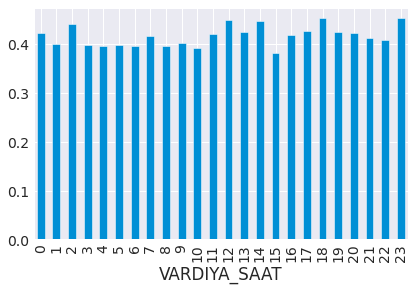

In [91]:
deneme3.groupby("VARDIYA_SAAT").std()["ISKARTA"].plot(kind="bar")

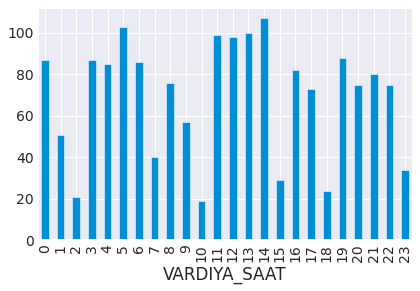

In [92]:
deneme3.groupby("VARDIYA_SAAT").sum().ISKARTA.plot(kind="bar")

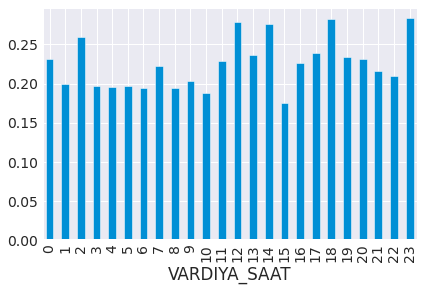

In [93]:
deneme3.groupby("VARDIYA_SAAT").mean()["ISKARTA"].plot(kind="bar")

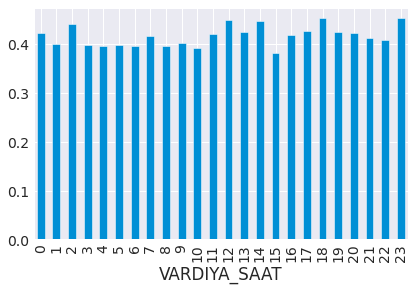

In [94]:
deneme3.groupby("VARDIYA_SAAT").std()["ISKARTA"].plot(kind="bar")

In [95]:
deneme3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 8490
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MAKINE               7573 non-null   category
 1   fazK_dk              7573 non-null   float64 
 2   FazS_dk              7573 non-null   float64 
 3   FazD_dk              7573 non-null   float64 
 4   FazB_dk              7573 non-null   float64 
 5   FazS_Basinci_Mean    7573 non-null   float64 
 6   FazS_Basinci_Stdev   7573 non-null   float64 
 7   FazB_Basinci_Max     7573 non-null   float64 
 8   FazK_Basinci_Last    7573 non-null   float64 
 9   FazD_Basinci_Last    7573 non-null   float64 
 10  K17_K16_Mesafe       7573 non-null   float64 
 11  K16                  7573 non-null   float64 
 12  K18                  7573 non-null   float64 
 13  K17                  7573 non-null   float64 
 14  K19                  7573 non-null   float64 
 15  K20                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


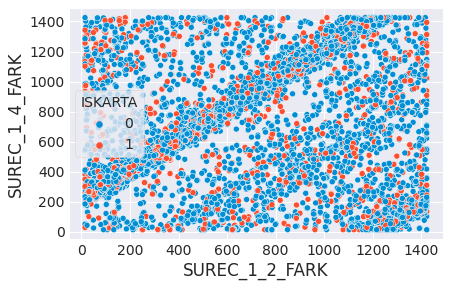

In [96]:
sns.scatterplot(df.SUREC_1_2_FARK, df.SUREC_1_4_FARK, hue=df.ISKARTA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


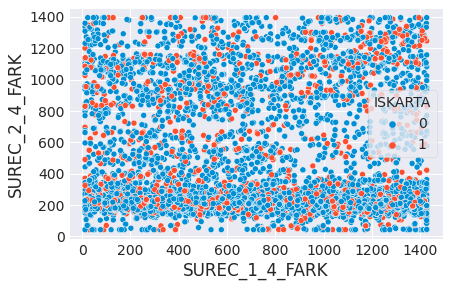

In [97]:
sns.scatterplot(df.SUREC_1_4_FARK, df.SUREC_2_4_FARK, hue=df.ISKARTA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


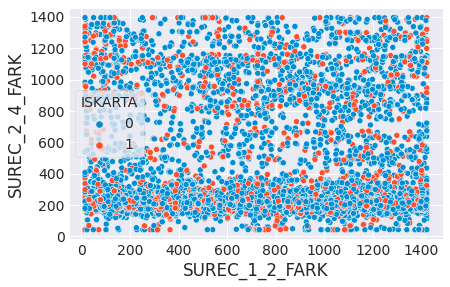

In [98]:
sns.scatterplot(df.SUREC_1_2_FARK, df.SUREC_2_4_FARK, hue=df.ISKARTA)

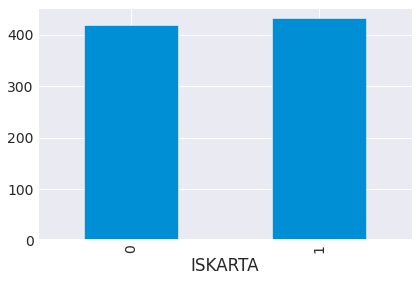

In [99]:
deneme3.groupby("ISKARTA")["SUREC_1_2_FARK"].std().plot(kind="bar")

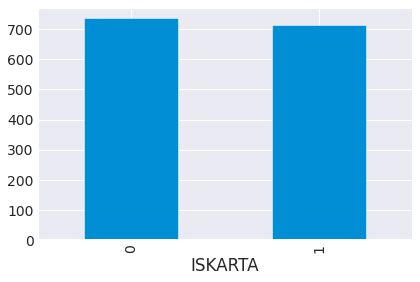

In [100]:
deneme3.groupby("ISKARTA")["SUREC_1_2_FARK"].mean().plot(kind="bar")


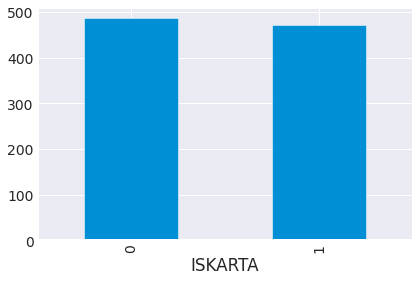

In [101]:
deneme3.groupby("ISKARTA")["SUREC_2_4_FARK"].mean().plot(kind="bar")

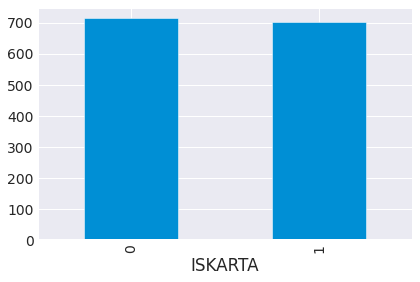

In [102]:
deneme3.groupby("ISKARTA")["SUREC_1_4_FARK"].mean().plot(kind="bar")

In [103]:
print(deneme3.groupby("ISKARTA")["SUREC_1_4_FARK"].mean())
print(deneme3.groupby("ISKARTA")["SUREC_1_4_FARK"].std())
print(deneme3.groupby("ISKARTA")["SUREC_2_4_FARK"].mean())
print(deneme3.groupby("ISKARTA")["SUREC_2_4_FARK"].std())
print(deneme3.groupby("ISKARTA")["SUREC_1_2_FARK"].mean())
print(deneme3.groupby("ISKARTA")["SUREC_1_2_FARK"].std())

ISKARTA
0    714.831323
1    702.103064
Name: SUREC_1_4_FARK, dtype: float64
ISKARTA
0    418.104779
1    419.413769
Name: SUREC_1_4_FARK, dtype: float64
ISKARTA
0    486.510290
1    472.273771
Name: SUREC_2_4_FARK, dtype: float64
ISKARTA
0    389.685631
1    384.919061
Name: SUREC_2_4_FARK, dtype: float64
ISKARTA
0    736.031604
1    715.257119
Name: SUREC_1_2_FARK, dtype: float64
ISKARTA
0    418.593537
1    431.903996
Name: SUREC_1_2_FARK, dtype: float64


In [104]:
deneme3.columns

Index(['MAKINE', 'fazK_dk', 'FazS_dk', 'FazD_dk', 'FazB_dk',
       'FazS_Basinci_Mean', 'FazS_Basinci_Stdev', 'FazB_Basinci_Max',
       'FazK_Basinci_Last', 'FazD_Basinci_Last', 'K17_K16_Mesafe', 'K16',
       'K18', 'K17', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24',
       'K23_K24_Mesafe', 'K25', 'K26', 'K26_K25_Mesafe', 'K27', 'K28', 'K29',
       'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37', 'K38', 'K39',
       'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46', 'Surec4_K1',
       'Surec4_K2', 'Surec4_K3', 'ISKARTA', 'Vardiya_1', 'Vardiya_2',
       'Vardiya_3', 'SUREC_1_2_FARK', 'SUREC_1_4_FARK', 'SUREC_2_4_FARK',
       'SUREC_1_2_FARK_SAAT', 'SUREC_1_4_FARK_SAAT', 'SUREC_2_4_FARK_SAAT',
       'VARDIYA_SAAT', 'VARDIYA', 'SUREC1_FARK', 'DateMonth', 'DateDay',
       'DateDayofweek', 'DateDayofyear', 'DateElapsed'],
      dtype='object')

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7762376237623763


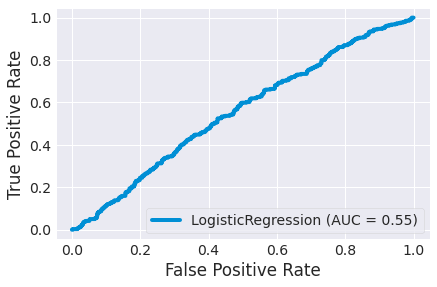

In [106]:
model.fit(X_train2, y_train)
y_preds = model.predict(X_test2)

plot_roc_curve(model, X_test2, y_test)
print(accuracy_score(y_preds, y_test))

In [107]:
confusion_matrix(y_preds, y_test)

array([[1176,  339],
       [   0,    0]])

In [108]:
deneme3.ISKARTA.dtype

dtype('int64')

In [109]:
# df_org = deneme3[['DateDayofweek', "MAKINE", "fazK_dk", "Vardiya_1", "SUREC1_FARK", "DateElapsed", "SUREC_1_2_FARK", "SUREC_1_4_FARK", "SUREC_2_4_FARK", "FazD_Basinci_Last"]]
# target= deneme3["ISKARTA"]

In [110]:
# for i in df_org.columns:
#     if (df_org[i].dtype) in ["float64", "int64"]:
#         df_org[i] = df_org[i].astype("int64")

In [ ]:
from autofeat import AutoFeatClassifier
for steps in range(5):
    np.random.seed(55)
    print("### AutoFeat with %i feateng_steps" % steps)
    afreg = AutoFeatClassifier(verbose=1, feateng_steps=steps)
    df = afreg.fit_transform(X_train2, y_train)
    r2 = afreg.score(X_train2, y_train)
    print("## Final R^2: %.4f" % r2)
    plt.figure()
    plt.scatter(afreg.predict(X_test2), y_test, s=2)
    cols = len(afreg.new_feat_cols_)
    title = f"{steps} FE steps (R^2: {r2} / {cols} new features)"
    plt.title(title)

### AutoFeat with 0 feateng_steps
[AutoFeat] The 0 step feature engineering process could generate up to 64 features.
[AutoFeat] With 6058 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Warning: no features generated for max_steps < 1.
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 0 features after noise filtering
[featsel] WARNING: Not a single good features was found...
[AutoFeat] Final dataframe with 64 feature columns (0 new).
[AutoFeat] Training final classification model.
[AutoFeat] Trained model: largest coefficients:
[-0.02809168]
0.535221 * x036
0.478870 * x038
0.470347 * x037
0.436427 * x032
0.315134 * x019
0.270809 * x018
0.250074 * x033
0.208915 * x010
0.197384 * x005
0.190641 * x020
0.190562 * x043
0.167758 * x031
0.162968 * x006
0.161303 * x022
0.159097 * x023
0.157627

In [ ]:
from autofeat import AutoFeatClassifier
model = AutoFeatClassifier()
df = model.fit_transform(X_train2, y_train)
y_pred = model.predict(X_test2)
print("Final Accuracy: %.4f" % model.score(X_test2, y_test))

In [ ]:
accuracy_score(y_pred, y_test)